In [1]:
%run useful_functions.py

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


update 15


In [2]:
directory = 'Financial_values/'

industry_codes_dict={}
for folder in os.listdir(directory):
    csv_file_path=directory+folder+"/industry_codes.csv"

    industry_code=pd.read_csv(csv_file_path)
    try:
        FF_code=industry_code["FF_Industry_codes"].value_counts().idxmax()
    except:
        FF_code=12

    industry_codes_dict[folder]=FF_code

In [37]:
try:
    del name

except:
    "nothing"

In [38]:
df_industry_code = pd.DataFrame(list(industry_codes_dict.items()), columns=['Index', 'FF_codes'])

In [39]:
df_industry_code["FF_sectors"]=df_industry_code["FF_codes"].apply(lambda x : industries_index[x-1])

In [40]:
sector_counts = df_industry_code['FF_sectors'].value_counts()

In [41]:
labels_condition=sector_counts/sector_counts.sum()
labels_condition=labels_condition.values

In [42]:
count=sector_counts.values

In [43]:
name=sector_counts.index.to_numpy()

In [44]:
mask=labels_condition<=0.06
for i,tf in enumerate(mask):
    if tf:
        name[i]+="  ("+str(np.round(100*labels_condition[i],1))+"%)"

In [51]:
indices=np.array([9,8,2,11,7,5,10,6,0,1,3,4])
#indices=np.array([4,3,1,0,6,10,5,7,11,2,8,9])
#indices=np.array([2,8,9,4,3,1,0,6,10,5,7,11])
#indices=np.arry([0,6,10,5,7,11,2,8,9,4,3,1])

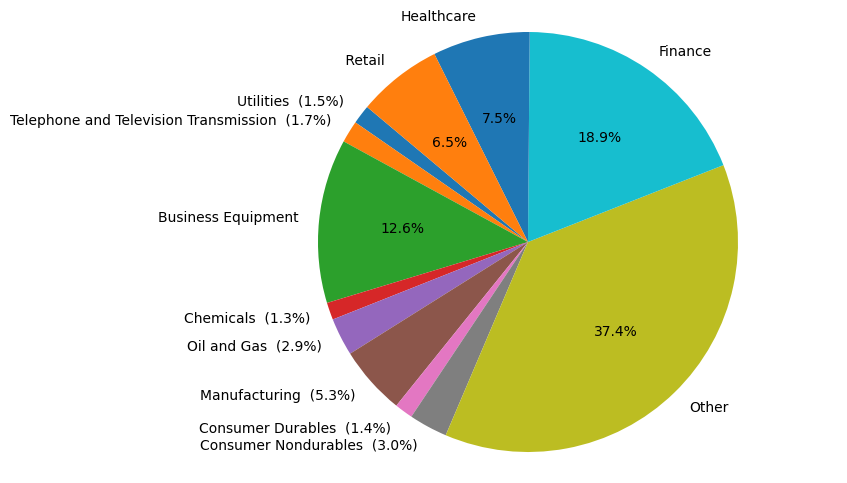

In [52]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))

# Define a custom autopct function
def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct >= 6 else ''

# Plot the pie chart with custom autopct


plt.pie(count[indices], labels=name[indices], autopct=my_autopct, startangle=140)


plt.axis('equal')
plt.show()